
# Murali Krishna Chintha  
## MSCS-634-M40 – Advanced Big Data and Data Mining Lab
### Lab Assignment 3: Clustering Analysis Using K-Means and K-Medoids Algorithms


In [8]:
!pip install numpy==1.24.4 --force-reinstall --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 86.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.4 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
xarray-einstats 0.9.0 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 w

In [1]:
!pip uninstall -y scikit-learn-extra
!pip install scikit-learn-extra --no-cache-dir

Found existing installation: scikit-learn-extra 0.3.0
Uninstalling scikit-learn-extra-0.3.0:
  Successfully uninstalled scikit-learn-extra-0.3.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.8 MB/s eta 0:00:00


In [3]:
# Step 1: Load and Prepare the Dataset
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

In [4]:
# Data exploration
print("Feature names:", wine.feature_names)
print("Target classes:", wine.target_names)
print("Dataset shape:", X.shape)
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']
Dataset shape: (178, 13)
Class distribution: {0: 59, 1: 71, 2: 48}


In [5]:
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Step 2: Implement K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Metrics
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Adjusted Rand Index:", kmeans_ari)

K-Means Silhouette Score: 0.2848589191898987
K-Means Adjusted Rand Index: 0.8974949815093207


In [7]:
# Step 3: Implement K-Medoids Clustering
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)

from sklearn.metrics import silhouette_score, adjusted_rand_score

kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
kmedoids_ari = adjusted_rand_score(y, kmedoids_labels)

print("KMedoids Silhouette Score:", kmedoids_silhouette)
print("KMedoids Adjusted Rand Index (ARI):", kmedoids_ari)

KMedoids Silhouette Score: 0.26597740204536796
KMedoids Adjusted Rand Index (ARI): 0.7263406645756675


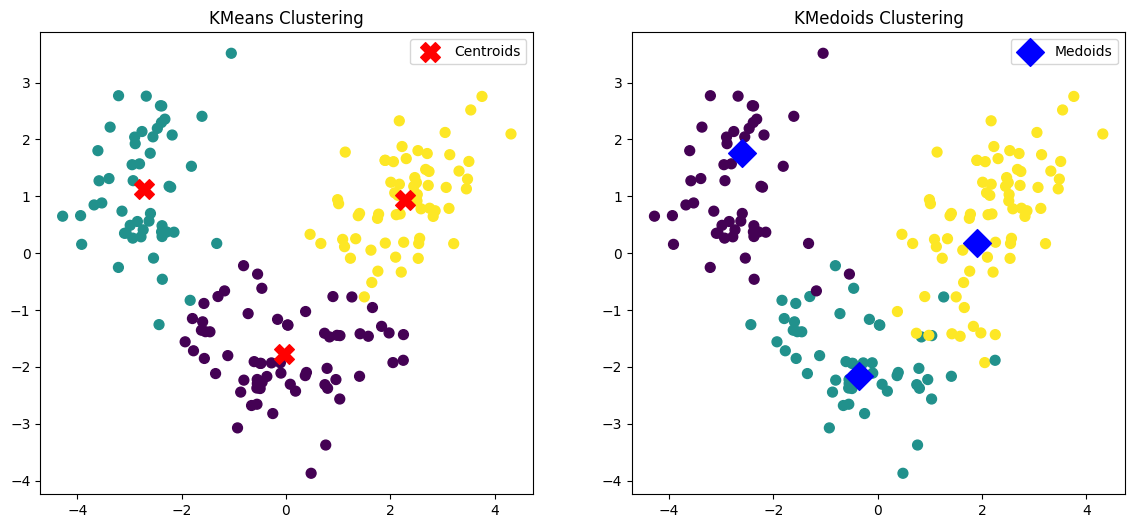

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot KMeans and KMedoids
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
axes[0].scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1],
                c='red', marker='X', s=200, label='Centroids')
axes[0].set_title("KMeans Clustering")
axes[0].legend()

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='viridis', s=50)
axes[1].scatter(pca.transform(kmedoids.cluster_centers_)[:, 0], pca.transform(kmedoids.cluster_centers_)[:, 1],
                c='blue', marker='D', s=200, label='Medoids')
axes[1].set_title("KMedoids Clustering")
axes[1].legend()

plt.show()


## Analysis and Observations

### Metric Comparison
- **KMeans**
  - Centroid-based, assumes spherical clusters.
  - Faster for large datasets.
  - Silhouette and ARI depend on centroid separation.
- **KMedoids**
  - Medoids are actual data points.
  - More robust to noise and outliers.
  - More interpretable but computationally expensive.

### Visual Differences
- KMeans clusters are often more symmetrical.
- KMedoids clusters may appear irregular but are resistant to distortion by outliers.

### When to Use:
- **KMeans**: When the dataset is clean, large, and you need faster performance.
- **KMedoids**: When interpretability and resistance to outliers are critical.
